# Unit 5 - Financial Planning


In [270]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [271]:
# Load .env enviroment variables
load_dotenv()

True

In [30]:
## Part 1 - Personal Finance Planner

In [272]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000.00

### Collect Crypto Prices Using the `requests` Library

In [273]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [274]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [275]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()

print(json.dumps(btc_data, indent=4))
# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url).json()

print(json.dumps(eth_data, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18517331,
            "total_supply": 18517331,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11408.88,
                    "volume_24h": 20373171705,
                    "market_cap": 211261930168,
                    "percentage_change_1h": 0.0616525649505872,
                    "percentage_change_24h": -0.173191785062975,
                    "percentage_change_7d": 6.94473246310901,
                    "percent_change_1h": 0.0616525649505872,
                    "percent_change_24h": -0.173191785062975,
                    "percent_change_7d": 6.94473246310901
                }
            },
            "last_updated": 1602720577
        }
    },
    "metadata": {
        "timestamp": 1602720577,
        "num_

In [276]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_data["data"]["1027"]["quotes"]["USD"]["price"]
crypto = my_btc_value + my_eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13690.66
The current value of your 5.3 ETH is $2008.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [277]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [278]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [279]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]


# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")
df_portfolio

Current AGG closing price: $118.66
Current SPY closing price: $318.89


AGG                                      SPY  \
                             open    high     low    close   volume   open   
time                                                                         
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959  313.3   

                                                          
                             high  low   close    volume  
time                                                      
2020-07-14 00:00:00-04:00  319.76  312  318.89  79292036

In [281]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
shares = my_agg_value + my_spy_value

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")


The current value of your 200 AGG shares is $23731.00
The current value of your 50 SPY shares is $15944.50


### Savings Health Analysis

In [282]:
# Create savings DataFrame
# YOUR CODE HERE!
#savings = {"amount":[crypto, shares]}
#df_savings = pd.DataFrame(index =["crypto", "shares"])
# 1. list of dictionaries
# 2. dictionary of lists
total_crypto = crypto
total_shares = shares
l = {"amount":[total_crypto, total_shares]}

df_savings = pd.DataFrame(l,index=["Crypto", "Shares"])

# Display savings DataFrame
display(df_savings)
 

,amount
Crypto,15698.667
Shares,39675.500


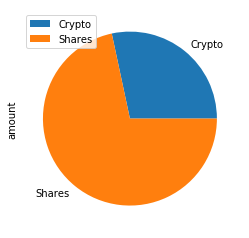

In [283]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind="pie", y="amount")

In [284]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto + shares
# Validate saving health
# YOUR CODE HERE!

if (total_savings > monthly_income):
    print ("Congratulations! You have enough money in your emergency fund.")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [285]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-13', tz='America/New_York').isoformat()

In [286]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2015-10-13 00:00:00-04:00  109.62  109.7500  109.4900  109.63  1360561   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2015-10-13 00:00:00-04:00  200.65  202.16  200.05  200.22  72076783  
2015-10-14 00:00:00-04:00  200.18  200.87  198.94  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.64  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.92  203.14  79323870  
2015-10-19 00:00:00-04:00  202.50  203.37  202.13  203.33  61255929

In [287]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_forcast = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*30
)


In [288]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_forcast.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2015-10-13 00:00:00-04:00  109.62  109.7500  109.4900  109.63  1360561   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-10-13 00:00:00-04:00          NaN  200.65  202.16  200.05  200.22   
2015-10-14 00:00:00-04:00     0.003649  200.18  200.87  198.94  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.64  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.92  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.13  203.33   

                                                  
                             volume daily_return  
time                                              
2015-10-13 00:00:00-04:00  72076783          NaN  
2015-10-14 00:00:00-04:00  82856686    -0.004745  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935

In [289]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_forcast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983971,1.008461,1.009201,1.012190,0.994643,1.000732,0.994587,0.997541,1.001273,0.999621,...,1.011022,0.988664,1.000269,1.001590,0.997811,1.014209,0.996791,0.991562,1.007293,0.997551
2,0.991255,1.007501,1.011493,1.015128,0.985196,1.005790,0.992609,0.999414,1.012384,0.995671,...,1.015350,0.986902,0.993967,0.996989,0.998970,1.013642,0.997195,1.001850,0.994259,0.994933
3,0.980297,1.006803,1.010458,1.020410,0.986346,1.003484,0.990102,1.008327,1.019066,0.998941,...,1.028746,0.990028,0.984828,1.000124,0.989973,1.023315,0.989650,1.007891,1.005891,0.986192
4,0.989965,1.010209,1.022329,1.016540,0.977059,1.012103,0.990362,1.017575,1.023855,0.995771,...,1.025801,0.996391,0.989752,0.996237,0.990387,1.013401,0.989484,1.012605,1.010846,0.992701
5,0.982646,1.013237,1.016504,1.008840,0.965081,1.006017,0.999778,1.016528,1.023311,0.997565,...,1.033516,0.991874,0.991337,0.994978,0.996641,1.015621,0.984769,1.012507,1.001540,0.990472
6,0.985737,1.011002,1.017716,0.999795,0.971890,1.014775,1.003452,1.020160,1.020945,0.996533,...,1.028311,0.985763,0.982383,0.996321,0.997102,1.009185,0.988754,1.016374,0.997958,0.985805
7,0.984757,1.010931,1.021376,1.004553,0.961697,1.017454,0.998741,1.021266,1.022161,0.996426,...,1.018639,0.989011,0.977461,0.996545,0.995236,1.022917,0.997277,1.015907,0.996391,0.992491
8,0.991036,1.014158,1.011757,1.017790,0.960003,1.022942,1.012016,1.028606,1.032386,0.996574,...,1.023774,0.982241,0.983035,0.994952,0.993155,1.028828,0.998250,1.007867,0.998918,0.989593
9,1.000444,1.017843,1.015597,1.016330,0.953440,1.013677,1.018305,1.028906,1.035057,1.004513,...,1.016994,0.984933,0.978597,0.996969,1.005902,1.019685,1.001688,1.002904,1.005105,0.991935


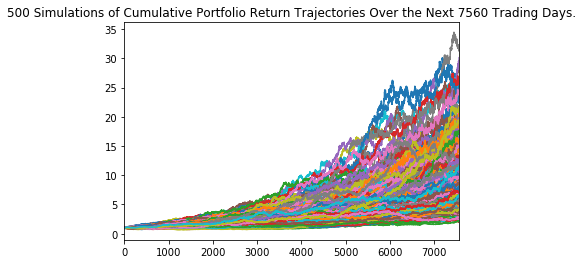

In [290]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_forcast.plot_simulation()

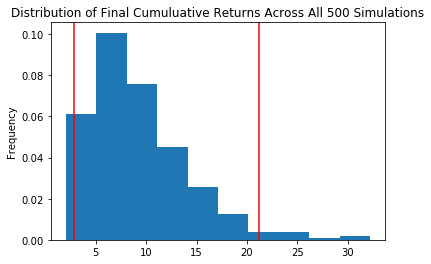

In [291]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_forcast.plot_distribution()


### Retirement Analysis

In [292]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_forcast.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.221642
std               4.858679
min               2.033669
25%               5.743096
50%               8.185856
75%              11.579820
max              32.214024
95% CI Lower      2.892760
95% CI Upper     21.215139
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [293]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
forcast_ci_lower = round(tbl[8]*20000,2)
forcast_ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${forcast_ci_lower} and ${forcast_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $57855.2 and $424302.78


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [294]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
forcast_ci_lower = round(tbl[8]*30000,2)
forcast_ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${forcast_ci_lower} and ${forcast_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $86782.8 and $636454.17


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [295]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_forcast = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*5
)

In [296]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_forcast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004426,0.998357,0.996919,1.000580,0.997860,1.001666,1.005020,1.000226,1.001120,0.992818,...,1.013946,1.007005,1.001571,1.001570,1.004248,1.009231,1.000703,1.004299,1.010709,1.007362
2,1.005935,0.995921,0.998066,0.990649,0.995298,0.997440,1.003295,1.014797,0.997929,0.987760,...,1.006480,1.009768,1.005029,1.017456,1.005366,1.014922,1.005726,1.009794,1.016243,1.000511
3,1.007169,0.995493,0.992026,0.988634,0.992926,1.000182,1.006179,1.029197,0.999638,0.987242,...,1.010291,1.013162,1.004528,1.007251,1.004918,1.019557,1.008462,1.009359,1.014656,1.009521
4,1.004371,0.995849,0.995039,0.998977,0.993268,1.002801,1.008562,1.036331,1.000974,0.990757,...,1.014425,1.007701,1.008490,1.001995,1.015953,1.023197,1.020281,1.016431,1.015727,1.026360
5,0.995737,0.998437,1.006559,0.998661,0.998440,1.005040,1.008896,1.038395,0.995772,0.992202,...,1.014500,1.013854,1.012515,0.996413,1.011761,1.024394,1.013209,1.020421,1.002736,1.019267
6,0.997942,0.996673,1.000975,1.004257,0.982982,1.000871,1.015113,1.037464,0.991516,0.988003,...,1.011492,1.004154,1.018542,1.006943,1.011656,1.024162,1.008427,1.009021,1.002228,1.022605
7,0.993015,0.993494,0.993468,0.998175,0.982843,0.999593,1.007704,1.034923,0.992083,0.996477,...,1.011056,1.011722,1.009724,1.007333,1.008617,1.013023,1.011781,1.014903,1.002094,1.026040
8,0.994841,1.000641,0.992026,0.997770,0.989774,1.000773,1.023145,1.028525,0.997463,0.999505,...,1.009423,1.018804,1.016395,1.011407,1.004281,1.004882,0.997675,1.013492,0.995325,1.025711
9,1.003973,0.999058,0.997854,0.994467,0.994961,1.002227,1.033299,1.035099,1.000030,1.005899,...,1.000430,1.013939,1.017519,1.008119,1.014712,1.014244,0.999888,1.003592,1.005337,1.033999


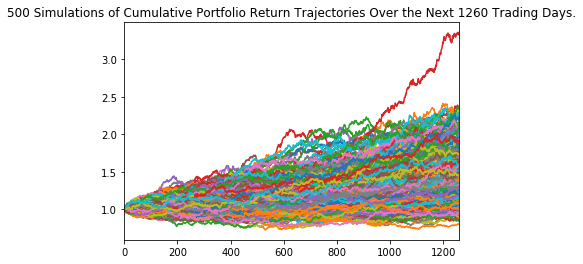

In [297]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_forcast.plot_simulation()

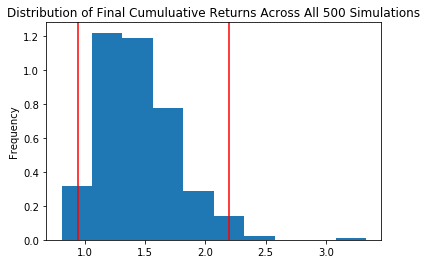

In [298]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_forcast.plot_distribution()

In [299]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five = MC_forcast.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.440019
std               0.319866
min               0.804892
25%               1.203849
50%               1.398122
75%               1.643300
max               3.333142
95% CI Lower      0.939438
95% CI Upper      2.193655
Name: 1260, dtype: float64


In [300]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
forcast_ci_lower_five = round(tbl[8]*60000,2)
forcast_ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${forcast_ci_lower_five} and ${forcast_ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $173565.6 and $1272908.34


### Ten Years Retirement Option

In [301]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_forcast = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*10
)

In [302]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_forcast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990927,1.002134,1.001030,1.000071,0.994582,1.009829,0.998350,0.997236,1.003442,1.007954,...,0.994733,0.997393,0.983737,1.004255,1.006770,0.998291,1.004307,1.001661,1.009478,0.992593
2,1.003681,1.003568,1.006606,1.001690,0.995460,1.014033,0.996994,0.997541,1.004992,1.009763,...,0.993675,0.989545,0.992770,1.008597,1.010909,0.986506,0.994902,1.003662,1.015504,0.983559
3,0.999890,1.000771,0.993550,1.002111,0.999010,1.015504,0.984768,1.000049,1.002931,1.013494,...,0.999451,0.984045,0.993246,1.012717,1.016485,0.988156,0.998863,1.004987,1.020887,0.982087
4,1.004238,1.000828,1.000040,1.015808,1.006683,1.017977,0.987858,1.003510,1.004810,1.009771,...,1.001293,0.988812,0.992206,1.016313,1.010683,0.984727,1.003968,0.995965,1.017101,0.978772
5,1.004668,0.998567,1.002282,1.000656,1.006100,1.011774,0.993205,1.003682,0.995562,1.016946,...,1.001344,0.978612,0.999350,1.010781,1.016324,0.996343,1.009289,0.996270,1.011159,0.983772
6,1.009231,0.994291,1.001967,0.997443,1.002574,1.010487,0.997013,1.001059,0.993919,1.015258,...,1.007272,0.976207,1.003936,1.011386,1.010837,0.996575,0.999831,0.999429,1.017056,0.984156
7,1.007894,0.997986,1.000956,0.993861,0.998478,1.020704,0.991418,1.008628,0.998155,1.003867,...,1.007336,0.976742,1.001142,1.019963,1.028369,1.000826,1.001898,0.996011,1.018666,0.981328
8,1.015550,0.999071,0.999267,0.997529,0.997665,1.024074,0.997719,1.010873,1.005198,0.996649,...,1.007315,0.978639,0.997946,1.026385,1.030269,1.005260,1.005680,1.012516,1.020451,0.978727
9,1.024349,1.006305,1.002308,0.994809,1.005699,1.007425,0.999516,1.018721,1.004853,0.997661,...,1.009845,0.977798,1.007738,1.031390,1.026326,1.002148,0.998037,1.015932,1.022894,0.987551


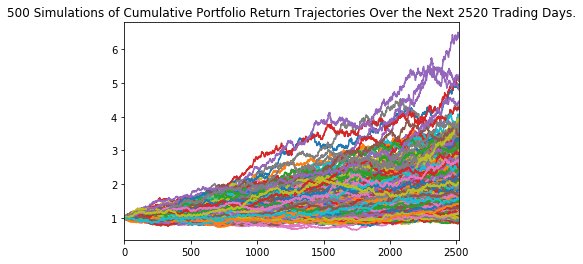

In [303]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_forcast.plot_simulation()

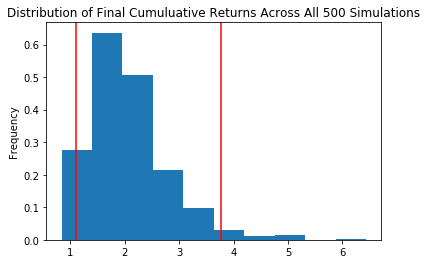

In [304]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_forcast.plot_distribution()

In [305]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_forcast.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.067468
std               0.721570
min               0.840358
25%               1.587369
50%               1.929199
75%               2.422439
max               6.434040
95% CI Lower      1.097753
95% CI Upper      3.772229
Name: 2520, dtype: float64


In [306]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
forcast_ci_lower_ten = round(tbl[8]*60000,2)
forcast_ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${forcast_ci_lower_ten} and ${forcast_ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $173565.6 and $1272908.34
